[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading stopwards: Package 'stopwards' not found in
[nltk_data]     index
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        10
           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion matrix:
 [[10  0  0]
 [ 0  2  0]
 [ 0  0  8]]


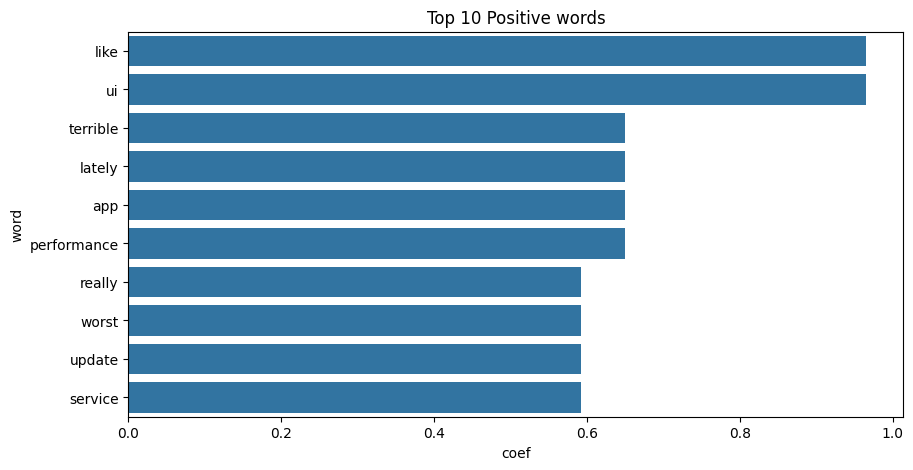

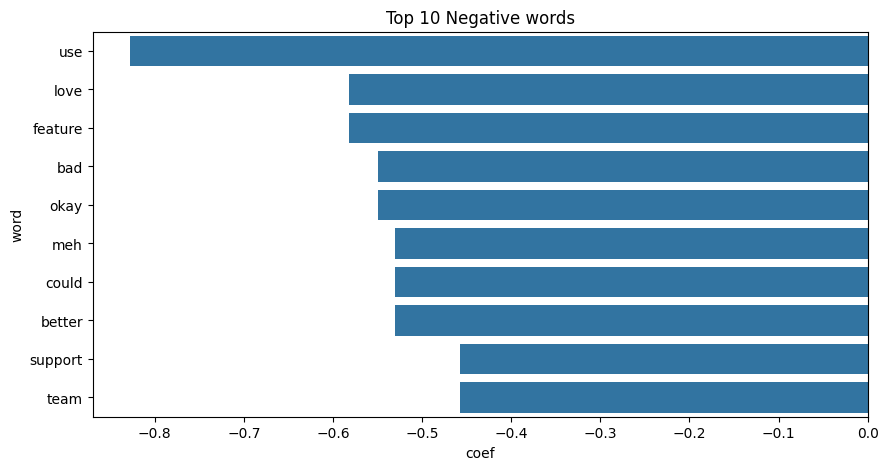

In [11]:
# Sentiment Analysis on Social Media Posts
!pip install scikit-learn -U
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwards')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Step 1: Load your dataset
df= pd.read_csv("/content/social_media_posts.csv")
# Step 2: Add sample post_text
example_texts= ["I love this feature!", "Worst update ever.", "This is okay, not too bad.", "Amazing experience, would use again!", "Really disappointed with the service.", "Meh, could use better.", "Fantastic support team!", "I don't like the UI.", "Super easy to use and intuitive!", "Terrible app performance lately."]
df['post_text']= [random.choice(example_texts) for _ in range(len(df))]
# Step 3: Generate sentiment labels
def assign_sentiment(text):
  text= text.lower()
  if any(word in text for word in ["love", "amazing", "fantastic", "super", "easy"]):
    return "positive"
  elif any(word in text for word in ["worst", "disappointed", "terrible", "don't like"]):
    return "negative"
  else:
    return "neutral"
df['sentiment']= df['post_text'].apply(assign_sentiment)
# Step 4: Preprocess text
import nltk
nltk.download('stopwords')
stop_words= set(stopwords.words('english'))
def preprocess(text):
  tokens= word_tokenize(text.lower())
  tokens= [t for t in tokens if t.isalpha()]
  tokens= [t for t in tokens if t not in stop_words]
  return " ".join(tokens)
df['clean_text']= df['post_text'].apply(preprocess)
# Step 5: Prepare data for ML
vectorizer= TfidfVectorizer()
X= vectorizer.fit_transform(df['clean_text'])
y= df['sentiment']
# Encode sentiment labels
y= y.map({'positive':1, 'neutral':0, 'negative':-1})
# Train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)
# Step 6: Train model
model = LogisticRegression()
model.fit(X_train, y_train)
# Step 7: Evaluate model
y_pred= model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test,y_pred))
# Step 8: Insights- Top predictive words
coef_df= pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'coef': model.coef_[0]})
top_pos= coef_df.sort_values('coef', ascending= False).head(10)
top_neg= coef_df.sort_values('coef').head(10)
plt.figure(figsize= (10,5))
sns.barplot(x= 'coef', y= 'word', data= top_pos)
plt.title("Top 10 Positive words")
plt.show()
plt.figure(figsize= (10,5))
sns.barplot(x= 'coef', y= 'word', data= top_neg)
plt.title("Top 10 Negative words")
plt.show()